# Урок 6. Наивный байесовский классификатор

В уроке мы подробно рассмотрели, как работает наивный байесовский классификатор, на примере частотной таблицы. Такие данные на практике встречаются довольно редко (если вы не работаете с классификацией текстов), поэтому сейчас предлагаем самостоятельно разобрать принцип работы гауссовского наивного Байеса, который можно встретить чаще остальных.

### 1.
Посмотрите, что включает в себя новый датасет Wine, где собраны результаты химического анализа вин, выращенных в одном регионе Италии тремя различными культиваторами. В наборе каждый из объектов имеет 13 числовых признаков.

Изучите попарные графики признаков (в уроках мы рассматривали их с помощью функции pd.plotting.scatter_matrix() ) и выберите такие два признака, используя которые, на ваш взгляд, можно будет лучше всего разделить данные по трем классам. Помните о том, что модель гауссовского наивного Байеса использует для предсказаний среднее и разброс значений признаков относительно среднего, поэтому вероятнее всего, лучшими признаками будут те, значения которых на графике разбросаны примерно одинаково от среднего значения, но как можно меньше накладываются на признаки других классов.

*Примечание: для наглядности в параметрах функции построения графиков примените figsize=(25, 25) - это позволит отобразить график достаточного размера для того, чтобы его изучить.*

In [2]:
from sklearn.datasets import load_wine
import pandas as pd

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000174163DF850>,
      dtype=object)

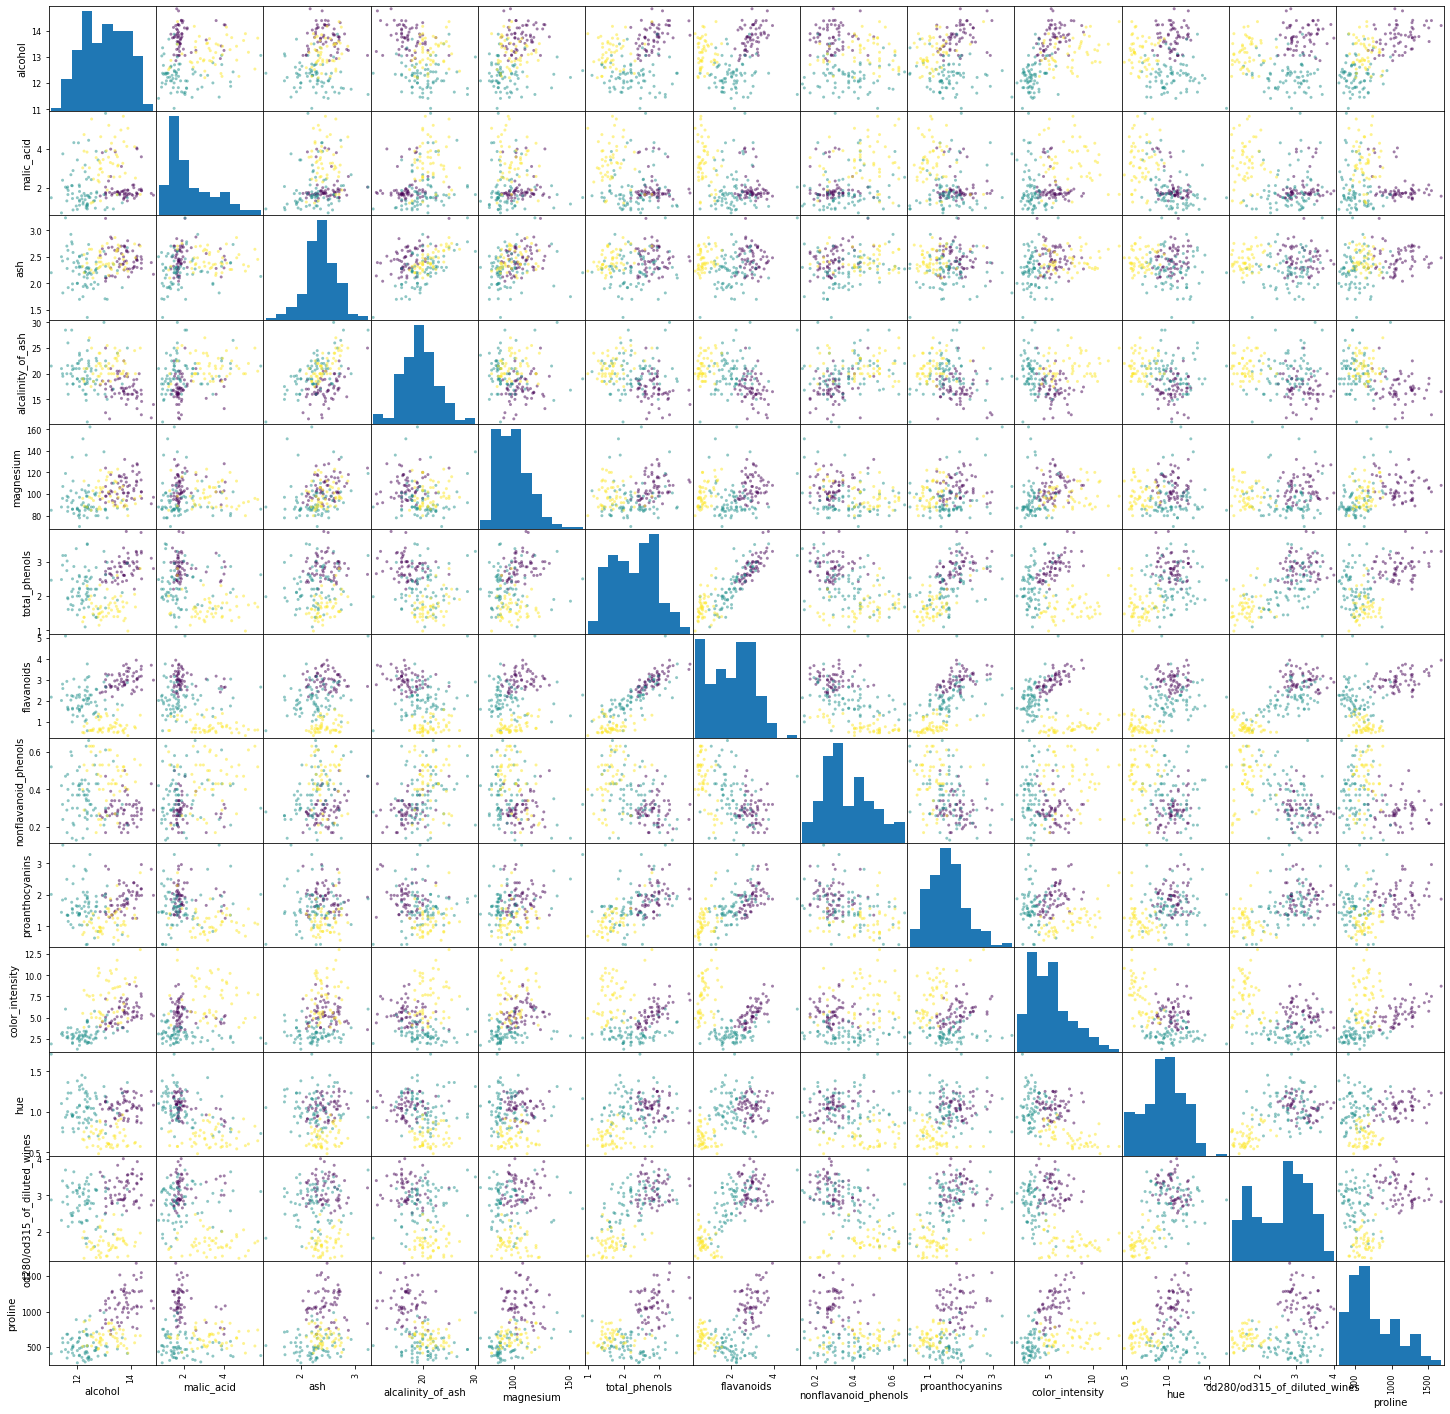

In [3]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
%matplotlib inline

wine = load_wine()
X, Y = wine.data, wine.target
df = pd.DataFrame(X, columns=wine.feature_names)
pd.plotting.scatter_matrix(df, figsize=(25,25), c=Y)

#На вопрос однозначно ответить нельзя, пар возможных много, лично мне нравится пара hue (9) - color_intensity (10), своей очевидностью

### 2.
Разбейте данные на тренировочный и тестовый датасеты (при разбиении используйте параметр random_state=17 для воспроизводимости результатов) и постройте модель на двух выбранных признаках. Используя встроенную функцию *score()*, проверьте точность работы модели. Если score() меньше 0.88..., выберите по графику другие два признака и постройте модель на них. Укажите номера признаков, которые вы использовали (помните, что индекс массива признаков начинается с 0).

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [7]:
nb = GaussianNB()

Xp = df[["hue", "color_intensity"]].values

Xt, Xv, Yt, Yv = train_test_split(Xp, Y, train_size=0.8, random_state=17)

nb.fit(Xt, Yt)
nb.score(Xv, Yv)
#Ну похоже, что глазами я выбрал правильно

0.9444444444444444

In [11]:
#Доработка, проверяем не на глаз

accuracies = {}

for i in range (13):
    for j in range (i+1, 13):
        x_train, x_test, y_train, y_test = train_test_split(wine.data[:, [i, j]], wine['target'], random_state=17)
        nb_model = nb.fit(x_train, y_train)
        nb_predictions = nb.predict(x_test)
        accuracy = nb.score(x_test, y_test)
        accuracies[(i, j)] = accuracy

print(sorted(accuracies.items(), key=lambda x: -x[1]))

#Наивысшую оценку получают пары признаков 10, 12 и 11, 12

[((10, 12), 0.9777777777777777), ((11, 12), 0.9777777777777777), ((0, 6), 0.9555555555555556), ((9, 11), 0.9555555555555556), ((0, 11), 0.9333333333333333), ((6, 9), 0.9333333333333333), ((6, 12), 0.9333333333333333), ((9, 10), 0.9333333333333333), ((6, 10), 0.9111111111111111), ((0, 10), 0.8888888888888888), ((2, 6), 0.8888888888888888), ((3, 6), 0.8888888888888888), ((5, 9), 0.8888888888888888), ((6, 7), 0.8888888888888888), ((8, 9), 0.8888888888888888), ((8, 12), 0.8888888888888888), ((9, 12), 0.8888888888888888), ((1, 9), 0.8666666666666667), ((4, 6), 0.8666666666666667), ((0, 5), 0.8444444444444444), ((5, 10), 0.8444444444444444), ((6, 11), 0.8444444444444444), ((7, 9), 0.8444444444444444), ((7, 12), 0.8444444444444444), ((0, 9), 0.8222222222222222), ((3, 9), 0.8222222222222222), ((4, 11), 0.8222222222222222), ((5, 12), 0.8222222222222222), ((0, 8), 0.8), ((0, 12), 0.8), ((1, 12), 0.8), ((2, 9), 0.8), ((2, 12), 0.8), ((3, 10), 0.8), ((4, 9), 0.8), ((4, 10), 0.8), ((5, 6), 0.8), ((

У модели GaussianNB есть метод predict_proba(test), который возвращает вероятности принадлежности каждого объекта из *test* к каждому из классов. 

### 3.
Еще раз обучите модель на признаках с номерами 11, 12, предварительно снова разбив данные на тренировочные и тестовые (с random_state=17). С помощью функции predict_proba() посмотрите, какие вероятности были вычислены для каждого из классов, и выведите эти вероятности для объекта x_test[0].

In [15]:
### YOUR CODE HERE ###
nb = GaussianNB()

Xp = X[:, 11:]
Xt, Xv, Yt, Yv = train_test_split(Xp, Y, train_size=0.8, random_state=17)

nb.fit(Xt, Yt)
print("score=",nb.score(Xv, Yv))

nb.predict_proba([Xv[0]]), Yv[0]
#Соответственно, второй класс

score= 1.0


(array([[3.94150380e-03, 9.95927916e-01, 1.30580049e-04]]), 1)